# Collective geoms

A collective geom displays multiple observations with one geometric object. Use `group` aesthetic.

Use `Oxboys` dataset from `nlme`

In [1]:
library(ggplot2)
library(repr)
options(repr.plot.width=3, repr.plot.height=2, repr.plot.res=180)

# multiplot function from Cookbook for R by Winston Chang
# http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
multiplot <- function(..., plotlist=NULL, file, ncol=1, layout=NULL, res=180) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)
  options(repr.plot.width=3*numPlots, repr.plot.height=2, repr.plot.res=res)

  # If layout is NULL, then use 'ncol' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of column
    layout <- matrix(seq(1, ncol * ceiling(numPlots/ncol)),
                    ncol = ncol, nrow = ceiling(numPlots/ncol))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
data(Oxboys, package = "nlme")
head(Oxboys)

Subject,age,height,Occasion
1,-1.0000,140.5,1
1,-0.7479,143.4,2
1,-0.4630,144.8,3
1,-0.1643,147.1,4
1,-0.0027,147.7,5
1,0.2466,150.2,6


## Multiple groups, one aesthetic

group before connecting lines

and to make figures look better, we define our own theme, explained later

In [3]:
myTheme = theme(plot.title = element_text(size = 10), axis.title = element_text(size = rel(0.8)))

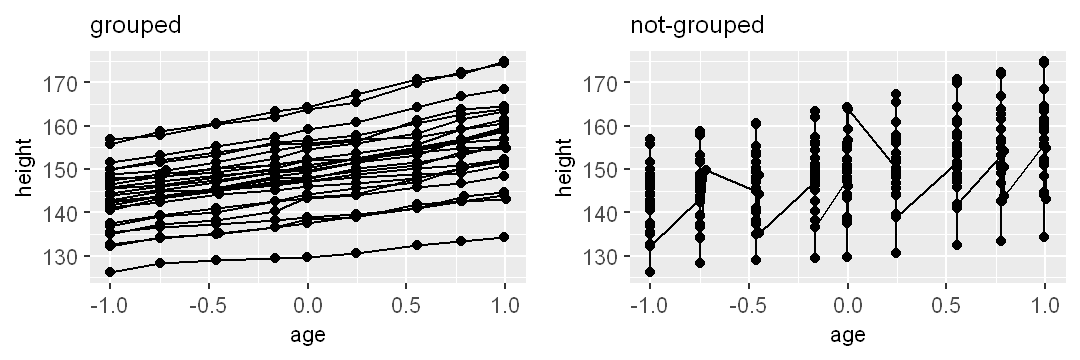

In [4]:
# grouped
plot1 <- ggplot(Oxboys, aes(age, height, group = Subject)) + 
geom_point() + 
geom_line() + 
ggtitle('grouped') + myTheme

# not-grouped
plot2 <- ggplot(Oxboys, aes(age, height)) + 
geom_point() + 
geom_line() +
ggtitle('not-grouped') + myTheme

multiplot(plot1,plot2,ncol=2)

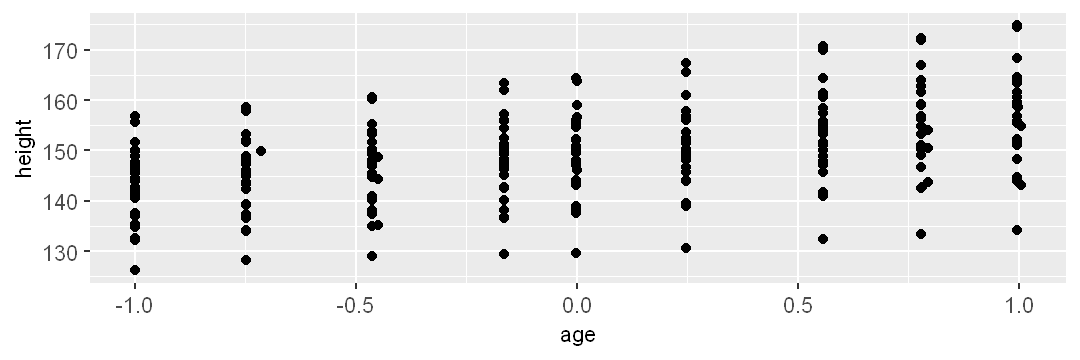

In [5]:
ggplot(Oxboys, aes(age, height,group = interaction(height, Occasion))) + 
geom_point() + 
geom_line() + 
myTheme

`group=interaction(colNameA,colNameB)` can make a combination of multiple variables, generally would make a more specified (smaller) group

## Different groups on different layers

After grouping in `ggplot()`, the smoother will also be calculated group by group.

- setting the grouping aesthetic in `ggplot()`: to all layers
- setting the grouping aesthetic in `geom_line()`: the line layer

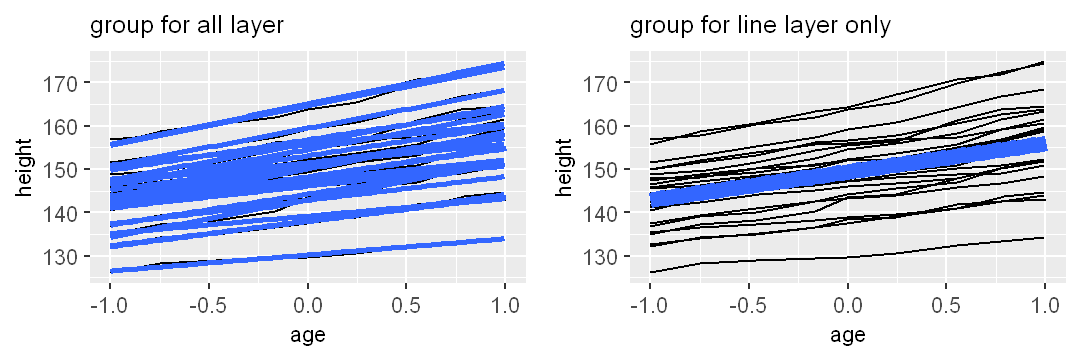

In [6]:
# group for all layer
plot1 <- ggplot(Oxboys, aes(age, height, group = Subject)) + 
geom_line() + 
geom_smooth(method = "lm", se = FALSE) + 
ggtitle('group for all layer') + myTheme
# group for line layer only
plot2 <- ggplot(Oxboys, aes(age, height)) + 
geom_line(aes(group = Subject)) + 
geom_smooth(method = "lm", size = 3, se = FALSE) + 
ggtitle('group for line layer only') + myTheme

multiplot(plot1, plot2, ncol=2)

smoother accept `size=sizeNum` for its width

## Overriding the default grouping

When dealing with a discrete x scale, it's like data is grouped according to this scale, see the following box plot

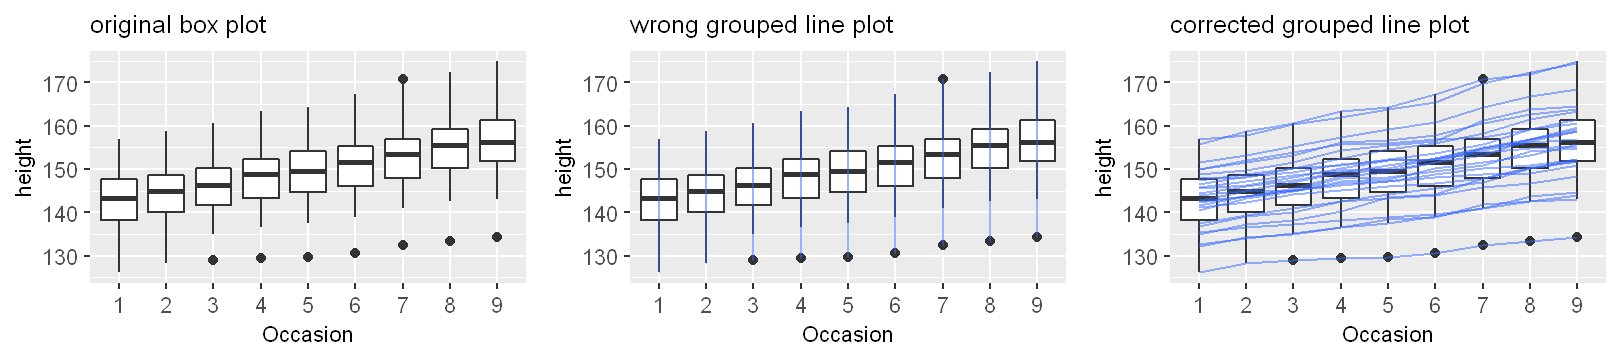

In [7]:
# original box plot
plot0 <- ggplot(Oxboys, aes(Occasion, height)) + 
geom_boxplot() + 
ggtitle("original box plot") + myTheme
# wrong grouped line plot
plot1 <- ggplot(Oxboys, aes(Occasion, height)) + 
geom_boxplot() + 
geom_line(colour = "#3366FF", alpha = 0.5) + 
ggtitle("wrong grouped line plot") + myTheme
# corrected grouped line plot
plot2 <- ggplot(Oxboys, aes(Occasion, height)) + 
geom_boxplot() +
geom_line(aes(group = Subject), colour = "#3366FF", alpha = 0.5) + 
ggtitle("corrected grouped line plot") + myTheme

multiplot(plot0,plot1,plot2,ncol=3)

## Matching aesthetics to graphic objects

`geom_line()` and `geom_point()` operate on a "**first value**" principle: `ggplot2` *applies the aesthetic value associated with the first observation when drawing the line segment*. See below pictures

Simple data `df` will be used.

In [30]:
df <- data.frame(x = 1:4, y = c(2,4,4,6), colour = c(1,3,5,7))
df

x,y,colour
1,2,1
2,4,3
3,4,5
4,6,7


`c()` function is to combine values into a vector or list

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


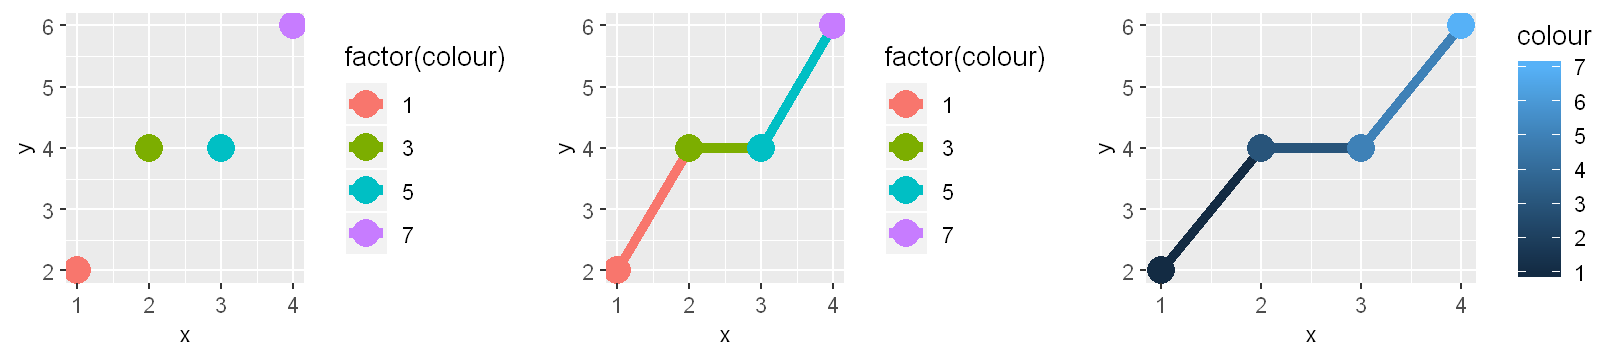

In [46]:
plot1 <- ggplot(df, aes(x, y, colour = factor(colour))) + 
geom_line(size = 2) +
geom_point(size = 5)+ myTheme

plot2 <- ggplot(df, aes(x, y, colour = factor(colour))) + 
geom_line(aes(group = 1), size = 2) +
geom_point(size = 5)+ myTheme

plot3 <- ggplot(df, aes(x, y, colour = colour)) + 
geom_line(size = 2) +
geom_point(size = 5)+ myTheme

multiplot(plot1,plot2,plot3,ncol=3)

An key concept shown here is grouping. 

`aes(group=Constant)`, a constant assigned to `group` (in this case we can save using function `aes()` and put `group=Constant` outside), will remove the default group. Two good references can be found [here](https://www.gl-li.com/2017/08/13/ggplot2-group-overrides-default-grouping/) by Guanglai Li, and an [answer](https://stackoverflow.com/a/39879232) from eipi10.

`factor()` function will make a vector a enumerated type. It orders the vector and add a level indicates its order to it.

The left figure is grouped by `colour = factor(colour)`, since it's enumerated and becomes categorial, however the middle one's group is removed by mapping `group=Constant`, so that lines are connected and follow the **first value** principle.

The right one is not grouped since column `colour` contains only numbers and is considered continous. Keeping the group will cause the left figure unable to connect points, and removing the group will not affect the right figure, since it's created without that.

What if you want the right one changing color smoothly?

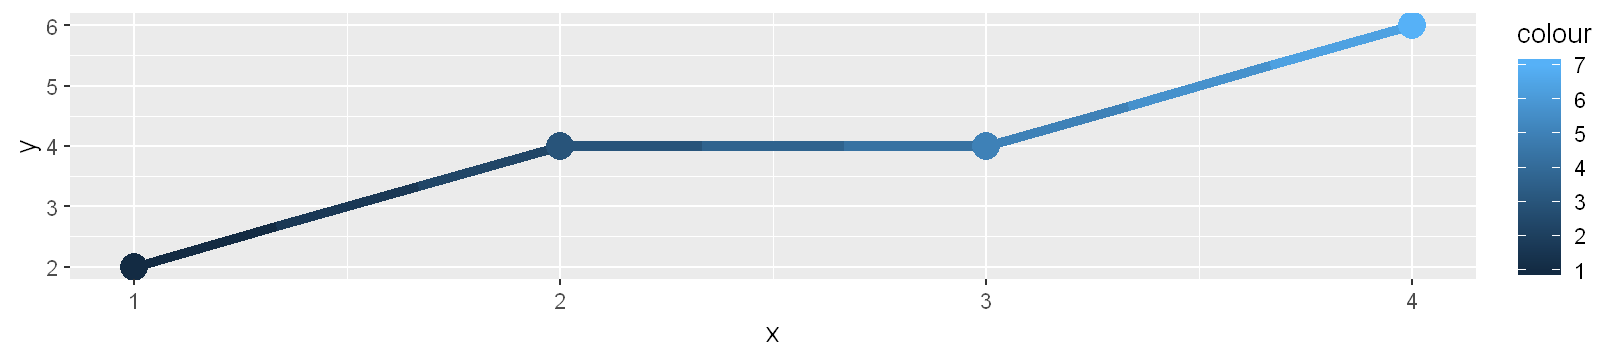

In [55]:
xgrid <- with(df, seq(min(x), max(x), length = 10))
interp <- data.frame(
  x = xgrid,
  y = approx(df$x, df$y, xout = xgrid)$y,
  colour = approx(df$x, df$colour, xout = xgrid)$y  
)
ggplot(interp, aes(x, y, colour = colour)) + 
geom_line(size = 2) +
geom_point(data = df, size = 5)

Larger the Number assigned to `legnth` will make this change even smoother.

Here `with()` could build a small environment constructed from the data `df`, so that the expression can find `x` from `df` not from the entire environment. `seq()` is to build a sequence. `approx()` is to make interpolation of `y` given `x` and `xgrid`.

---

For collective geoms, another rule: *the aesthetics from the individual components are used only if they are all the same. If the aesthetics differ for each component, ggplot2 uses a default value instead.*

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


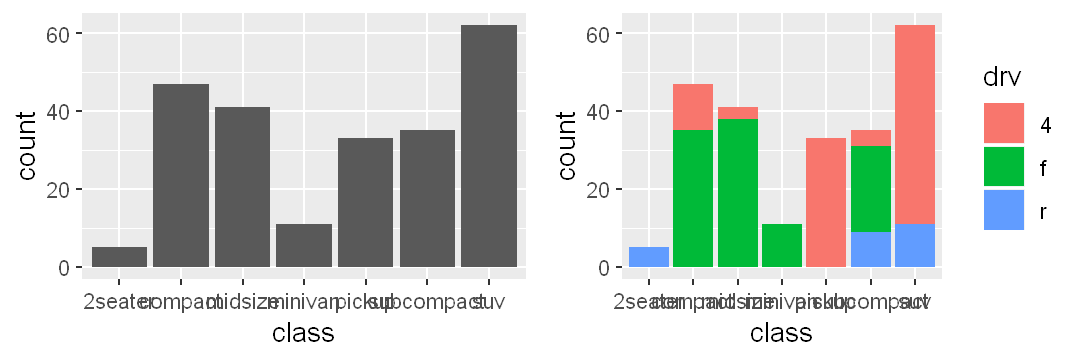

In [61]:
head(mpg)
p1 <- ggplot(mpg, aes(class)) + 
geom_bar()
p2 <- ggplot(mpg, aes(class, fill = drv)) + 
geom_bar()
multiplot(p1,p2,ncol = 2)

The left picture do nothing but counting. As for the right one, the counting is done after grouping and this grouping is from `fill=drv`, a discrete variable, however, you *cannot* use `fill=hwy`, a continuous variable.

Also in `fill=drv`, the colored bars of same class with different `drv` are stacked as a single bar following the reverse-alphabet order from the bottom.

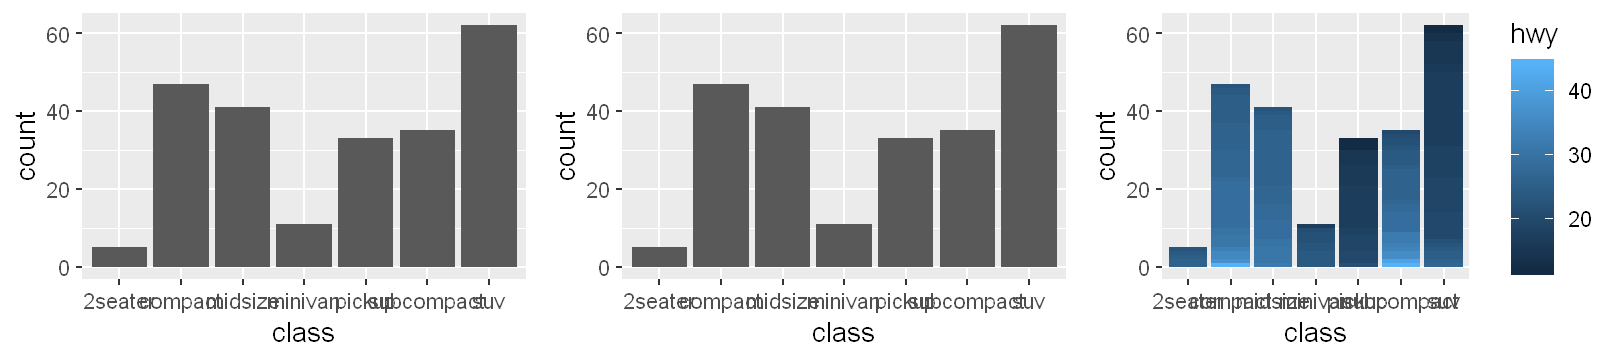

In [59]:
p1 <- ggplot(mpg, aes(class, fill = hwy)) + 
geom_bar()
p2 <- ggplot(mpg, aes(class, fill = hwy, group = class)) + 
geom_bar()
p3 <- ggplot(mpg, aes(class, fill = hwy, group = hwy)) + 
geom_bar()
multiplot(p1,p2,p3,ncol = 3)

And since using `fill=continCol` is not possible, it turns to default grouping, which is `group=class` since it's a barplot on `aes(class)`.

However if you change the group to that `continCol`, then the `contincol` will be treated *as if* it's discrete and has behavior just like `fill=drv`.

To make the fill be *really* discrete, use function `factor()`

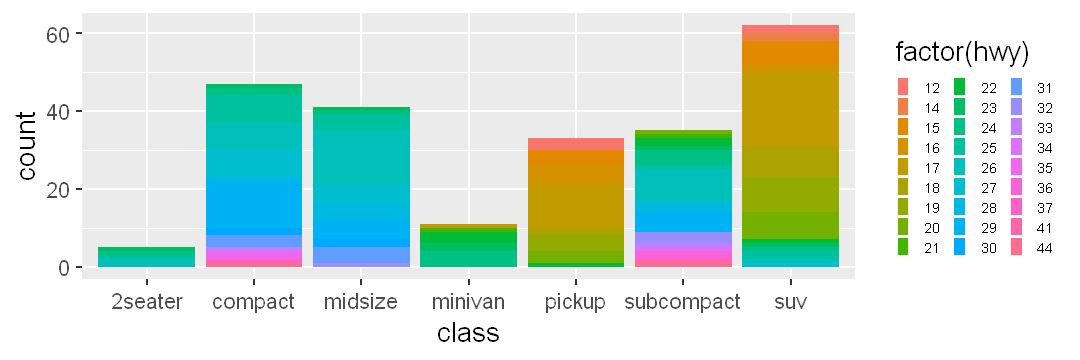

In [74]:
ggplot(mpg, aes(class, fill = factor(hwy), group = hwy)) + 
geom_bar() + 
theme(legend.key.width = unit(0.2,'cm'),legend.key.height = unit(0.2,'cm'), legend.text=element_text(size=rel(0.5))) + 
guides(fill=guide_legend(ncol=3))

Since there're two many different scales, we use `guides()` to adjust the columns of the legend